In [ ]:
#Step 1
# load the data
import pandas as pd
df=pd.read_excel("/content/knn_2d_blobs.xlsx")
print(df.head(10))

         x1        x2  label
0 -5.730354 -7.583286      2
1  1.942992  1.918875      1
2  6.829682  1.164871      1
3 -2.901306  7.550771      0
4  5.841093  1.565094      1
5  5.470215  1.117086      1
6 -4.319543 -6.976169      2
7  4.910336  1.922932      1
8  3.572258  1.830790      1
9 -7.504446 -6.854019      2


In [ ]:
#Step 2
# Define the features
# we seperate our input features (x1,x2) from the output label.
X=df[["x1","x2"]]  #features
y=df["label"]  # target class


# we tell computer to predict data from x1 and x2

In [ ]:
# Step 3
# we use 80% data to train the model and 20% to test it. This helps check how3 well the model works on unseen data.

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42) # random state - it uses the same random see meaning the random shuffle is repeatable.
# training set - what knn learns from
# test set- for checking accuracy


In [ ]:
# Step 4 - Scale the features
# knn works by measuring distances between points
#use standard scaler to scale all features equally.
#if one feature is larger than another, it dominates the distance . so we scale them to same range.

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

# this code ensures both x1 and x2 are treated equally when calculating distance.

In [ ]:
# Step 5
# create  and train the knn model

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)   # we use 5 nearest points
knn.fit(X_train_scaled,y_train)

# knn doesnt learn eqauations like regression, it just stores the training data , so when new point comes it looks for 5 nearest points.

KNeighborsClassifier()

In [ ]:
# Step 6
# Test the model (make predictions)
# we now ask the model top predict the class for test data
y_pred=knn.predict(X_test_scaled)

In [ ]:
# Step 7
# CHECK ACCURACY
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
print("Accuracy:",round(acc,2))

Accuracy: 1.0


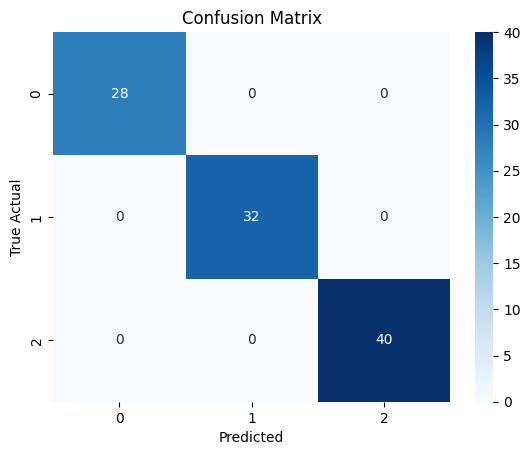

In [ ]:
# Step 8
# see Confusion matrix
# this hsows exactly how many were correctly or incorrectly classified

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True Actual")
plt.show()

# 28 data belongs to 0 group
# 32 belongs to 1 grp and 40 data belongs to 2 group class

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


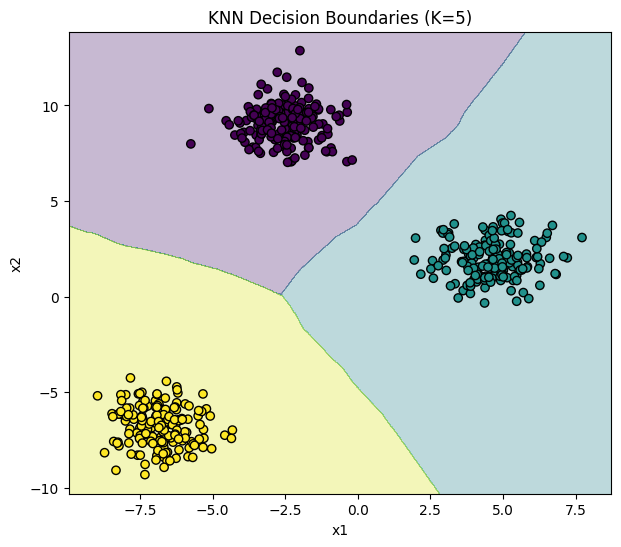

In [ ]:
# Step 9
# visualize decision boundaries
import numpy as np
x_min,x_max=X["x1"].min()-1,X["x1"].max()+1
y_min,y_max=X["x2"].min()-1,X["x2"].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.02),np.arange(y_min,y_max,0.02))         # We create a mesh grid = a fine grid of points covering the whole area.
Z=knn.predict(scaler.transform(np.c_[xx.ravel(),yy.ravel()]))            # ravel() flattens the 2D arrays xx and yy into 1D lists.
                                                                                  # np.c[] combines them column_wise
Z=Z.reshape(xx.shape)

plt.figure(figsize=(7,6))
plt.contourf(xx,yy,Z,alpha=0.3,cmap="viridis")
plt.scatter(X["x1"],X["x2"],c=y,cmap="viridis",edgecolor="k")
plt.title("KNN Decision Boundaries (K=5)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()


In [ ]:
# TASK : PREDICTIONS FOR NEW X1 AND X2 VALUES AFTER TRAINING KNN MODEL.

In [ ]:
new_points=np.array([
    [0.5,-2],
    [-6,5],
    [4,6]
])
new_points_scaled=scaler.transform(new_points)
predicted_labels=knn.predict(new_points_scaled)
print("Predicted Labels:",predicted_labels)

Predicted Labels: [1 0 1]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


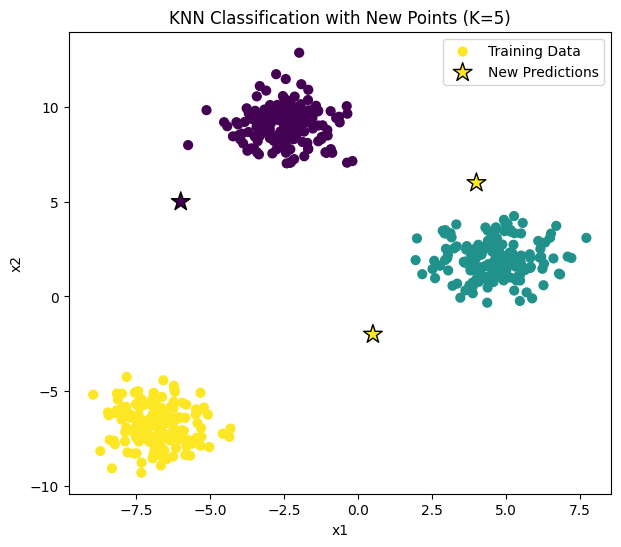

In [ ]:
# plot exixting data
plt.figure(figsize=(7,6))
plt.scatter(X["x1"],X["x2"],c=y,cmap="viridis",s=40,label="Training Data")
# plot new points (predictions)
plt.scatter(new_points[:,0],new_points[:,1],c=predicted_labels,cmap="viridis",edgecolor="black",s=200,marker="*",label="New Predictions")
plt.title("KNN Classification with New Points (K=5)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()